# Exponential models

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def delta_d(n, i, R0=5, delay_death=10):
    if n <= 0:
        return 0
    return R0*i[n-1]

def delta_i(n, i, R0=5):
    if n <= 0:
        return 0
    return R0 * i[n-1]

R0 = 5  # will change to follow strategies

d = []
i = []
n_days = 60
days = list(range(n_days))


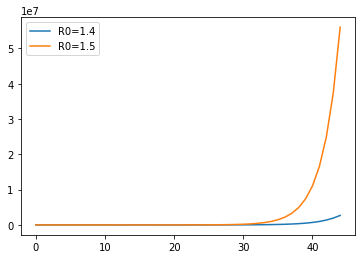

In [2]:
%matplotlib inline

def simple_exponential(initial_number_of_infected=0, R0=5, label=''):
    d = []
    i = []
    n_days = 45
    days = list(range(n_days))
    for n in range(n_days):
        i_n = delta_i(n, i, R0=R0)
        if n == 0:
            i_n += initial_number_of_infected
        i.append(i_n)
        d_n = delta_d(n, i, R0=R0)
        d.append(d_n)
    
    return plt.plot(days, i, label=label[0:7])

for R in np.arange(1.4, 1.55, 0.1):
    f = simple_exponential(initial_number_of_infected=1, R0=R, label='R0='+str(R))
ax = plt.gca()
l = ax.legend()

# Evaluating R0 from the data of different countries


In [3]:
from loading_data import load
deaths, confirmed = load()
print(deaths['Country/Region'].to_list())

['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada', 'Australia', 'Australia', 'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden', 'Spain', 'Australia', 'Belgium', 'Egypt', 'Australia', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia', 'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Australia', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Australia', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Hungary', 'Australia', 'Liechtenstein', 'Poland', 'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa', 'Bhutan', 'Cameroon', 'Colombia', 'Costa Rica', 'Peru',

In [4]:
print(deaths.loc[13])

Province/State                     NaN
Country/Region    United Arab Emirates
Lat                                 24
Long                                54
1/22/20                              0
                          ...         
3/14/20                              0
3/15/20                              0
3/16/20                              0
3/17/20                              0
3/18/20                              0
Name: 13, Length: 61, dtype: object


In [5]:
df = deaths
france_index = df.index[df['Province/State']=='France'].tolist()[0]
deaths.loc[france_index]

Province/State     France
Country/Region     France
Lat               46.2276
Long               2.2137
1/22/20                 0
                   ...   
3/14/20                91
3/15/20                91
3/16/20               148
3/17/20               148
3/18/20               148
Name: 157, Length: 61, dtype: object

In [6]:
import seaborn as sns
sns.set()

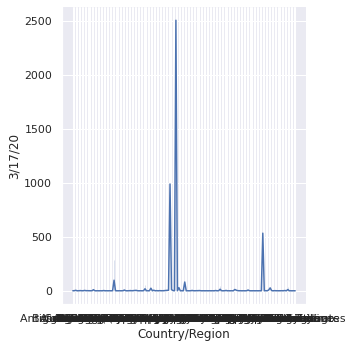

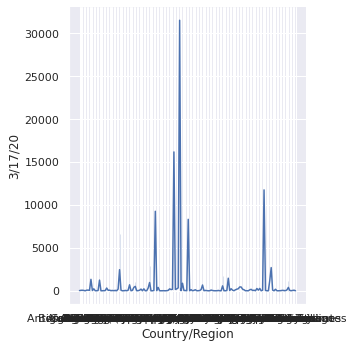

In [7]:
# sns.plots(', '3/17/20', deaths)
sns.relplot(x='Country/Region', y='3/17/20', kind="line", data=deaths);
sns.relplot(x='Country/Region', y='3/17/20', kind="line", data=confirmed);

$$d(t) = \alpha i(t-\delta)$$
$$i(t+1) = R_0 i(t)$$
so if $i$ was reliable
$$ R_0 = < \frac{i(t+1)}{i(t)} >$$ 
$\alpha$ and $\delta$ to optimise. We will need to do better because $i$ is underevaluated, so we will need to assess it from $d$ first, which requires knowing the parameters relating them, so we will have to make some assumptions.

In [4]:
# Assuming $i$ was correct:
# import os
# os.environ['PATH'] += ':' + os.environ['PWD']

from loading_data import get_data_pd
data = get_data_pd(deaths, confirmed)


France
Italy
Korea, South


France


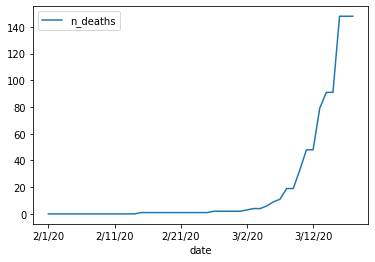

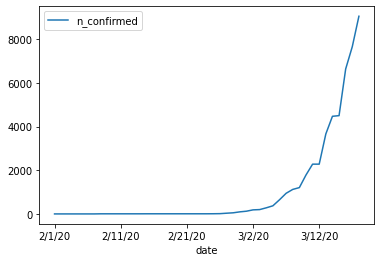

In [5]:
print('France')
f = data['France'].plot(x='date', y='n_deaths')
g = data['France'].plot(x='date', y='n_confirmed')

Italy


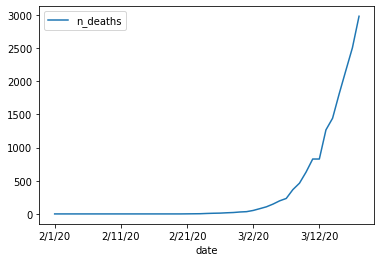

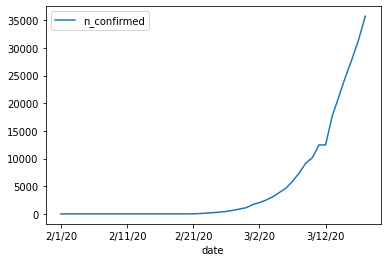

In [6]:
print('Italy')
f = data['Italy'].plot(x='date', y='n_deaths')
g = data['Italy'].plot(x='date', y='n_confirmed')

Korea, South


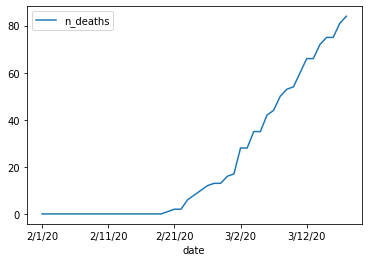

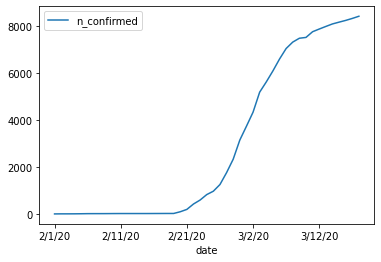

In [7]:
country = 'Korea, South'
print(country)
f = data[country].plot(x='date', y='n_deaths')
g = data[country].plot(x='date', y='n_confirmed')

nom: -56319.603281775766, denom: -947408
alpha=0.059445986609544955, beta=0.3828807180289644


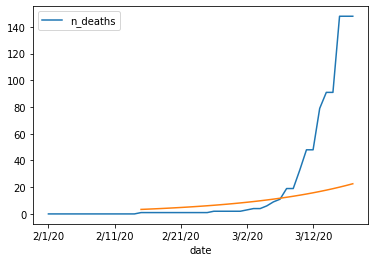

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Fit an exponential: minimise in alpha and beta $\sum_i(ln(n_i) - \alpha x_i - \beta)$
french_data = data['France']
x = np.array(list(range(len(french_data['n_deaths']))))
y = french_data['n_deaths']
non_zero_index = y != 0
x = x[non_zero_index]
y = y[non_zero_index]
# print(x, y)
# print(non_zero_index)
# print(x)
# print(y)
nominator = np.sum(np.multiply(np.log(y), x))   -   np.sum(np.log(y)) * np.sum(x)
denom = np.sum(np.multiply(x, x)) - np.sum(x) * np.sum(x)
print(f'nom: {nominator}, denom: {denom}')
alpha =  nominator / denom
beta = np.sum(np.log(y)) - alpha * np.sum(x)

print(f'alpha={alpha}, beta={beta}')

f = french_data.plot(x='date', y='n_deaths')
_ = plt.plot(x, np.exp(x * alpha + beta))


The fit is terrible; let's try a square of exponential, and fitting the points rather than their log

removing 0 days from the data when estimating the parameters
country=France, p=[-1.67905927e-02  1.60941831e+00 -3.34576659e+01]
removing 1 days from the data when estimating the parameters
country=France, p=[-9.99783838e-03  1.05247023e+00 -2.20816291e+01]
removing 2 days from the data when estimating the parameters
country=France, p=[-3.41208466e-03  5.27677750e-01 -1.16753417e+01]


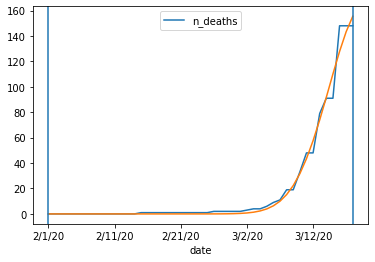

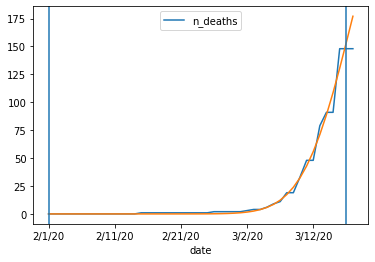

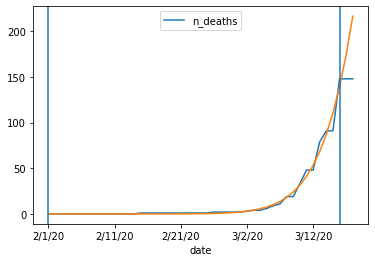

In [47]:
from scipy.optimize import minimize

# Fit a square of exponential: minimise in alpha and beta $\sum_i(ln(n_i) - \alpha x_i - \beta - \gamma x_i^2)$
def get_square_exp_parameters(data, country, n_last_days_to_remove=0, n_first_days_to_remove=0):
    full_country_data = data[country]
    n_days_to_use = len(full_country_data['n_deaths'])
    x_full = np.array(list(range(n_days_to_use)))
    
    
    country_data = full_country_data[n_first_days_to_remove:-n_last_days_to_remove] if n_last_days_to_remove else full_country_data
    x = np.array(list(range(len(country_data['n_deaths']))))
    y = country_data['n_deaths']

    def cost1(p):  # bad
        return np.sum(np.square(  np.log(y) - np.multiply(np.square(x), p[0]) - np.multiply(x, p[1]) - p[2] ))
    def cost2(p):  # good
        return np.sum(np.square(  y - np.exp(np.multiply(np.square(x), p[0]) + np.multiply(x, p[1]) + p[2]) ))
    cost = cost2
    p0 = np.array([0.0001, 1.1, -8])
    #     res = minimize(cost, p0)  options={'xatol': 1e-8, 'disp': True})
    # res = minimize(cost, p0,  method='CG', options={'disp': False, 'maxiter': 100})  # very bad
    res = minimize(cost, p0, method='nelder-mead', options={'xatol': 1e-8, 'disp': False})
    p = res.x
    print(f'country={country}, p={p}')


    f = full_country_data.plot(x='date', y='n_deaths')
    if cost == cost1:
        _ = plt.plot(x_full, np.exp(np.multiply(np.square(x_full), p[0]) + np.multiply(x_full, p[1]) + p[2]))
    elif cost == cost2:
        _ = plt.plot(x_full, np.exp(np.multiply(np.square(x_full), p[0]) + np.multiply(x_full, p[1]) + p[2]))            
    _ = plt.axvline(n_days_to_use - n_last_days_to_remove - 1)
    _ = plt.axvline(n_first_days_to_remove)
    return p

    
for n in range(3):
    print(f'removing {n} days from the data when estimating the parameters') 
    get_square_exp_parameters(data, 'France', n_last_days_to_remove=n, n_first_days_to_remove=0)


Much better fit, so better model for an evolution without strategies. Let's try these values on Italian data.

country=Italy, p=[-6.62872512e-03  7.55275979e-01 -1.27322175e+01]


array([-6.62872512e-03,  7.55275979e-01, -1.27322175e+01])

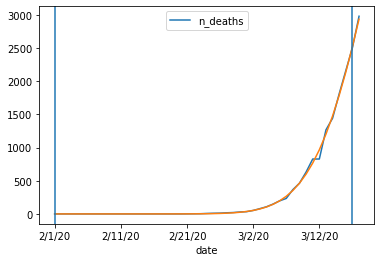

In [41]:
get_square_exp_parameters(data, 'Italy', n_last_days_to_remove=1, n_first_days_to_remove=0)

country=Korea, South, p=[-4.01823263e-03  3.81676528e-01 -4.66016605e+00]


array([-4.01823263e-03,  3.81676528e-01, -4.66016605e+00])

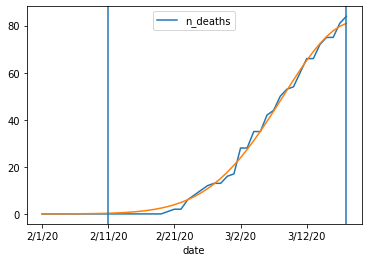

In [45]:
get_square_exp_parameters(data, 'Korea, South', n_first_days_to_remove=10)